In [35]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path
%matplotlib inline
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims
from skimage.measure import regionprops

In [36]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Fixed Culture/STEDBIN/20190703_syt488_vglut635P_tnr580/'
protein="TNR" #TNR,Agg,WFA,HABP

In [37]:
results = {"filename":[],
          "exp condition":[],
          "ecmchannelno":[],
          "sytchannelno":[],
           "vglutchannelno":[],
           "Manual vglut spots mask":[],
           "Manual syt1 spots mask":[],
          }
           
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    #if "_analyse" in str(filelist[i]):
        #print(1)
        if "2019" in str(filelist[i]):
            #print(2)
            if ("Pop" in str(filelist[i]))==False:
                #print(3)
                if ("save" in str(filelist[i]))==False:
                    #print(4)
                    if ("spot" in str(filelist[i]))==False:
                        if ("TIFs_analyse copy" in str(filelist[i]))==False:
                            #if ("samecell" in str(filelist[i]))==False:
                            
                            #print(5)
                                if filelist[i].endswith(".tif"): 
                                #print(6)
                                    if "\\" in str(filelist[i]):
                                        #print(7)
                                        if (('/').join(filelist[i].split('\\')[:-1])+'\\\\'+filelist[i][:-12].split('\\')[-1] in str(results["filename"]))==False:
                                            print(filelist[i])
                                            results["filename"].append(filelist[i][:-12])
                                            results["exp condition"].append(filelist[i][:-12].split('/')[-2])
                                            results["sytchannelno"].append(3)
                                            results["ecmchannelno"].append(2)
                                            results["vglutchannelno"].append(1)
                                    elif (str(filelist[i][:-12]) not in str(results["filename"]))==True:
                                        #print(8)
                                        results["filename"].append(filelist[i][:-12])
                                        results["exp condition"].append(filelist[i][:-12].split('/')[-2])
                                        results["sytchannelno"].append(3)
                                        results["ecmchannelno"].append(2)
                                        results["vglutchannelno"].append(1)

## load random image

Image name: 2_ExpControl
Experimental condition: TIF_imp


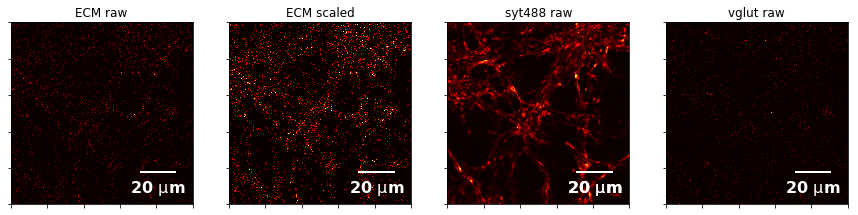

In [38]:
randomno=np.random.randint(1,len(results["filename"]))
ecm_channel_no=results["ecmchannelno"][randomno]
syt_channel_no=results["sytchannelno"][randomno]
vglut_channel_no=results["vglutchannelno"][randomno]

ecm_image_name=results["filename"][randomno]+" Ch"+str(ecm_channel_no)+" {0}.tif"
syt_image_name=results["filename"][randomno]+" Ch"+str(syt_channel_no)+" {0}.tif"
vglut_image_name=results["filename"][randomno]+" Ch"+str(vglut_channel_no)+" {0}.tif"


print("Image name:",results["filename"][randomno].split('/')[-1])
print("Experimental condition:",results["exp condition"][randomno])
ecm_image=pims.open(ecm_image_name)[0]
syt_image=pims.open(syt_image_name)[0]
vglut_image=pims.open(vglut_image_name)[0]
#autofluorescence_image=pims.open(autofluorescence_image_name)[0]

figure=plt.figure(figsize=(15,15))
figure.add_subplot(141)
plt.imshow(ecm_image,interpolation='none',cmap='hot')
plt.title('ECM raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
figure.add_subplot(142)
plt.imshow(ecm_image,interpolation='none',cmap='hot',vmin=3*np.min(ecm_image),vmax=0.4*np.max(ecm_image))
plt.title('ECM scaled')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

figure.add_subplot(143)
plt.imshow(syt_image,interpolation='none',cmap='hot')
plt.title('syt488 raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

plt.gca().add_artist(scalebar)

figure.add_subplot(144)
plt.imshow(vglut_image,interpolation='none',cmap='hot')
plt.title('vglut raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(40, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

## load synapse spots

In [39]:
for image in range(0,len(results["filename"])):
    results["Manual vglut spots mask"].append(np.load(results["filename"][image]+'_vglut_spots_mask.npy'))
    results["Manual syt1 spots mask"].append(np.load(results["filename"][image]+'_syt1_spots_mask.npy'))

## Make individual spot images

### (1) ECM around vglut spots

In [66]:
#regionprops centroid = center of spot
ecm_distribution_around_vgluts={"filename":[],
                                  "exp condition":[],
                                  "ecm_around_single_spot":[],
                                  "ecm_around_single_spot_mean_intensity":[],
                                  "ecm_around_single_spot bg subtracted":[],
                                  "ecm_around_single_spot_mean_intensity bg subtracted":[],
                                  
                                  "original_vglut_at_single_spot":[],
                                  "mean_intensty_original_vglut":[],
                                  "original_vglut_at_single_spot bg subtracted":[],
                                  "mean_intensty_original_vglut bg subtracted":[],
                                 "vglut size - no pixels in mask":[]}
                                  
for i in range(0,len(results["filename"])):
    #read the image
    ecm_channel_no=results["ecmchannelno"][i]
    ecm_image_name=results["filename"][i]+" Ch"+str(ecm_channel_no)+" {0}.tif"
    ecm_image=pims.open(ecm_image_name)[0]
    vglut_channel_no=results["vglutchannelno"][i]
    vglut_image_name=results["filename"][i]+" Ch"+str(vglut_channel_no)+" {0}.tif"
    vglut_image=pims.open(vglut_image_name)[0]
    
    #label connected components in spots mask
    spots_mask=results["Manual vglut spots mask"][i]
    if np.isnan(spots_mask.any())==False:
        spots_labeled, cc_num=ndi.label(spots_mask)
        #cut out ecm around spots - 100px by 100px (2x2 microns) 
        print('No spots in image: ' + str(cc_num))
        regions = regionprops(spots_labeled)
        for props in regions:
            y0, x0 = props.centroid
            center_of_spot=[0,0]
            center_of_spot[0]=np.round(y0).astype(int)
            center_of_spot[1]=np.round(x0).astype(int)
            area=props.area
            #check if the spot gets cut off at the border before taking
            if (((center_of_spot[1]-50>0) & (center_of_spot[1]+50>0))&((center_of_spot[0]-50>0) & (center_of_spot[0]+50>0))):
                #cut out the ecm around spot
                ecm_around_spot=ecm_image[center_of_spot[0]-50:center_of_spot[0]+50,
                      center_of_spot[1]-50:center_of_spot[1]+50]
                #cut out the vglut around spot
                original_vglut_at_single_spot=vglut_image[center_of_spot[0]-50:center_of_spot[0]+50,
                      center_of_spot[1]-50:center_of_spot[1]+50]
                if ecm_around_spot.shape==(100,100):
                    ecm_distribution_around_vgluts["filename"].append(results["filename"][i])
                    ecm_distribution_around_vgluts["exp condition"].append(results["exp condition"][i])
                    #append mean vglut intensity at spot
                    mean_intensty_original_vglut=np.mean(original_vglut_at_single_spot)
                    ecm_distribution_around_vgluts["mean_intensty_original_vglut"].append(mean_intensty_original_vglut)
                    #append ecm spot matrix
                    ecm_distribution_around_vgluts["ecm_around_single_spot"].append(ecm_around_spot)
                    #append vglut spot matrix
                    ecm_distribution_around_vgluts["original_vglut_at_single_spot"].append(original_vglut_at_single_spot)
                    #append ecm spot matrix
                    ecm_distribution_around_vgluts["ecm_around_single_spot_mean_intensity"].append(np.nanmean(ecm_around_spot))

                    #after bg subtraction
                    ecm_around_spot_bgsub=np.array(deepcopy(ecm_around_spot))
                    ecm_around_spot_bgsub=np.divide(ecm_around_spot_bgsub,255)
                    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
                    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
                    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0

                    vglut_around_spot_bgsub=np.array(deepcopy(original_vglut_at_single_spot))
                    vglut_around_spot_bgsub=np.divide(vglut_around_spot_bgsub,255)
                    bg_vglut=np.mean(ndi.median_filter(vglut_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(vglut_around_spot_bgsub,size=5))
                    vglut_around_spot_bgsub=np.subtract(vglut_around_spot_bgsub,bg_vglut)
                    vglut_around_spot_bgsub[vglut_around_spot_bgsub<0]=0

                    ecm_distribution_around_vgluts["mean_intensty_original_vglut bg subtracted"].append(np.nanmean(vglut_around_spot_bgsub))
                    ecm_distribution_around_vgluts["ecm_around_single_spot bg subtracted"].append(ecm_around_spot_bgsub)
                    ecm_distribution_around_vgluts["original_vglut_at_single_spot bg subtracted"].append(vglut_around_spot_bgsub)
                    ecm_distribution_around_vgluts["ecm_around_single_spot_mean_intensity bg subtracted"].append(np.nanmean(ecm_around_spot_bgsub))            
                    ecm_distribution_around_vgluts["vglut size - no pixels in mask"].append(area)            
                    
    else:
        print('spots is nan')
        ecm_distribution_around_vgluts["ecm_around_single_spot"].append(np.nan)
        ecm_distribution_around_vgluts["ecm_around_single_spot_mean_intensity"].append(np.nan)
        ecm_distribution_around_vgluts["ecm_around_single_spot bg subtracted"].append(np.nan)
        ecm_distribution_around_vgluts["ecm_around_single_spot_mean_intensity bg subtracted"].append(np.nan)

        ecm_distribution_around_vgluts["original_vglut_at_single_spot"].append(np.nan)
        ecm_distribution_around_vgluts["mean_intensty_original_vglut"].append(np.nan)
        ecm_distribution_around_vgluts["original_vglut_at_single_spot bg subtracted"].append(np.nan)
        ecm_distribution_around_vgluts["mean_intensty_original_vglut bg subtracted"].append(np.nan)
        ecm_distribution_around_vgluts["vglut size - no pixels in mask"].append(np.nan)


No spots in image: 160
No spots in image: 162
No spots in image: 191
No spots in image: 133
No spots in image: 143
No spots in image: 43
No spots in image: 111
No spots in image: 115
No spots in image: 19
No spots in image: 43
No spots in image: 44
No spots in image: 99
No spots in image: 83
No spots in image: 67
No spots in image: 85


### (2) ECM around syt1 spots

In [67]:
#regionprops centroid = center of spot
ecm_distribution_around_syts={"filename":[],
                                  "exp condition":[],
                                  "ecm_around_single_spot":[],
                                  "ecm_around_single_spot_mean_intensity":[],
                                  "ecm_around_single_spot bg subtracted":[],
                                  "ecm_around_single_spot_mean_intensity bg subtracted":[],
                                  
                                  "original_syt_at_single_spot":[],
                                  "mean_intensty_original_syt":[],
                                  "original_syt_at_single_spot bg subtracted":[],
                                  "mean_intensty_original_syt bg subtracted":[],
                                 "syt size - no pixels in mask":[]}
                                  
for i in range(0,len(results["filename"])):
    #read the image
    ecm_channel_no=results["ecmchannelno"][i]
    ecm_image_name=results["filename"][i]+" Ch"+str(ecm_channel_no)+" {0}.tif"
    ecm_image=pims.open(ecm_image_name)[0]
    syt_channel_no=results["sytchannelno"][i]
    syt_image_name=results["filename"][i]+" Ch"+str(syt_channel_no)+" {0}.tif"
    syt_image=pims.open(syt_image_name)[0]
    
    #label connected components in spots mask
    spots_mask=results["Manual syt1 spots mask"][i]
    if np.isnan(spots_mask.any())==False:
        spots_labeled, cc_num=ndi.label(spots_mask)
        #cut out ecm around spots - 100px by 100px (2x2 microns) 
        print('No spots in image: ' + str(cc_num))
        regions = regionprops(spots_labeled)
        for props in regions:
            y0, x0 = props.centroid
            center_of_spot=[0,0]
            center_of_spot[0]=np.round(y0).astype(int)
            center_of_spot[1]=np.round(x0).astype(int)
            area=props.area
            #check if the spot gets cut off at the border before taking
            if (((center_of_spot[1]-50>0) & (center_of_spot[1]+50>0))&((center_of_spot[0]-50>0) & (center_of_spot[0]+50>0))):
                #cut out the ecm around spot
                ecm_around_spot=ecm_image[center_of_spot[0]-50:center_of_spot[0]+50,
                      center_of_spot[1]-50:center_of_spot[1]+50]
                #cut out the syt around spot
                original_syt_at_single_spot=syt_image[center_of_spot[0]-50:center_of_spot[0]+50,
                      center_of_spot[1]-50:center_of_spot[1]+50]
                if ecm_around_spot.shape==(100,100):
                    ecm_distribution_around_syts["filename"].append(results["filename"][i])
                    ecm_distribution_around_syts["exp condition"].append(results["exp condition"][i])
                    #append mean syt intensity at spot
                    mean_intensty_original_syt=np.mean(original_syt_at_single_spot)
                    ecm_distribution_around_syts["mean_intensty_original_syt"].append(mean_intensty_original_syt)
                    #append ecm spot matrix
                    ecm_distribution_around_syts["ecm_around_single_spot"].append(ecm_around_spot)
                    #append syt spot matrix
                    ecm_distribution_around_syts["original_syt_at_single_spot"].append(original_syt_at_single_spot)
                    #append ecm spot matrix
                    ecm_distribution_around_syts["ecm_around_single_spot_mean_intensity"].append(np.nanmean(ecm_around_spot))

                    #after bg subtraction
                    ecm_around_spot_bgsub=np.array(deepcopy(ecm_around_spot))
                    ecm_around_spot_bgsub=np.divide(ecm_around_spot_bgsub,255)
                    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
                    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
                    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0

                    syt_around_spot_bgsub=np.array(deepcopy(original_syt_at_single_spot))
                    syt_around_spot_bgsub=np.divide(syt_around_spot_bgsub,255)
                    bg_syt=np.mean(ndi.median_filter(syt_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(syt_around_spot_bgsub,size=5))
                    syt_around_spot_bgsub=np.subtract(syt_around_spot_bgsub,bg_syt)
                    syt_around_spot_bgsub[syt_around_spot_bgsub<0]=0

                    ecm_distribution_around_syts["mean_intensty_original_syt bg subtracted"].append(np.nanmean(syt_around_spot_bgsub))
                    ecm_distribution_around_syts["ecm_around_single_spot bg subtracted"].append(ecm_around_spot_bgsub)
                    ecm_distribution_around_syts["original_syt_at_single_spot bg subtracted"].append(syt_around_spot_bgsub)
                    ecm_distribution_around_syts["ecm_around_single_spot_mean_intensity bg subtracted"].append(np.nanmean(ecm_around_spot_bgsub))            
                    ecm_distribution_around_syts["syt size - no pixels in mask"].append(area)            
                    
    else:
        print('spots is nan')
        ecm_distribution_around_syts["ecm_around_single_spot"].append(np.nan)
        ecm_distribution_around_syts["ecm_around_single_spot_mean_intensity"].append(np.nan)
        ecm_distribution_around_syts["ecm_around_single_spot bg subtracted"].append(np.nan)
        ecm_distribution_around_syts["ecm_around_single_spot_mean_intensity bg subtracted"].append(np.nan)

        ecm_distribution_around_syts["original_syt_at_single_spot"].append(np.nan)
        ecm_distribution_around_syts["mean_intensty_original_syt"].append(np.nan)
        ecm_distribution_around_syts["original_syt_at_single_spot bg subtracted"].append(np.nan)
        ecm_distribution_around_syts["mean_intensty_original_syt bg subtracted"].append(np.nan)
        ecm_distribution_around_syts["syt size - no pixels in mask"].append(np.nan)



No spots in image: 82
No spots in image: 100
No spots in image: 164
No spots in image: 99
No spots in image: 176
No spots in image: 68
No spots in image: 184
No spots in image: 210
No spots in image: 43
No spots in image: 71
No spots in image: 80
No spots in image: 135
No spots in image: 147
No spots in image: 112
No spots in image: 141


### (3) ECM around syt1/vglut mask overlap

In [68]:
#regionprops centroid = center of spot
ecm_distribution_around_syt_and_vgluts={"filename":[],
                                  "exp condition":[],
                                  "ecm_around_single_spot":[],
                                  "ecm_around_single_spot_mean_intensity":[],
                                  "ecm_around_single_spot bg subtracted":[],
                                  "ecm_around_single_spot_mean_intensity bg subtracted":[],
                                  
                                  "original_vglut_at_single_spot":[],
                                  "mean_intensty_original_vglut":[],
                                  "original_vglut_at_single_spot bg subtracted":[],
                                  "mean_intensty_original_vglut bg subtracted":[],
                                 "vglut size - no pixels in mask":[],
                                   
                                  "original_syt_at_single_spot":[],
                                  "mean_intensty_original_syt":[],
                                  "original_syt_at_single_spot bg subtracted":[],
                                  "mean_intensty_original_syt bg subtracted":[],
                                 "syt size - no pixels in mask":[]}                                 
for i in range(0,len(results["filename"])):
    #read the image
    ecm_channel_no=results["ecmchannelno"][i]
    ecm_image_name=results["filename"][i]+" Ch"+str(ecm_channel_no)+" {0}.tif"
    ecm_image=pims.open(ecm_image_name)[0]
    syt_channel_no=results["sytchannelno"][i]
    syt_image_name=results["filename"][i]+" Ch"+str(syt_channel_no)+" {0}.tif"
    syt_image=pims.open(syt_image_name)[0]
    vglut_channel_no=results["vglutchannelno"][i]
    vglut_image_name=results["filename"][i]+" Ch"+str(vglut_channel_no)+" {0}.tif"
    vglut_image=pims.open(vglut_image_name)[0]
    
    #label connected components in spots mask
    spots_maskvglut=results["Manual vglut spots mask"][i]
    spots_masksyt1=results["Manual syt1 spots mask"][i]
    spots_mask=np.multiply(spots_maskvglut,spots_masksyt1)
    if np.isnan(spots_mask.any())==False:
        spots_labeled, cc_num=ndi.label(spots_mask)
        #cut out ecm around spots - 100px by 100px (2x2 microns) 
        print('No spots in image: ' + str(cc_num))
        regions = regionprops(spots_labeled)
        for props in regions:
            y0, x0 = props.centroid
            center_of_spot=[0,0]
            center_of_spot[0]=np.round(y0).astype(int)
            center_of_spot[1]=np.round(x0).astype(int)
            area=props.area
            #check if the spot gets cut off at the border before taking
            if (((center_of_spot[1]-50>0) & (center_of_spot[1]+50>0))&((center_of_spot[0]-50>0) & (center_of_spot[0]+50>0))):
                
                #cut out the ecm around spot
                ecm_around_spot=ecm_image[center_of_spot[0]-50:center_of_spot[0]+50,
                      center_of_spot[1]-50:center_of_spot[1]+50]
                #cut out the syt around spot
                original_syt_at_single_spot=syt_image[center_of_spot[0]-50:center_of_spot[0]+50,
                      center_of_spot[1]-50:center_of_spot[1]+50]
                #cut out the vglut around spot
                original_vglut_at_single_spot=vglut_image[center_of_spot[0]-50:center_of_spot[0]+50,
                      center_of_spot[1]-50:center_of_spot[1]+50]
                
                if ecm_around_spot.shape==(100,100):
                    ecm_distribution_around_syt_and_vgluts["filename"].append(results["filename"][i])
                    ecm_distribution_around_syt_and_vgluts["exp condition"].append(results["exp condition"][i])
                    #append mean syt intensity at spot
                    mean_intensty_original_syt=np.mean(original_syt_at_single_spot)
                    ecm_distribution_around_syt_and_vgluts["mean_intensty_original_syt"].append(mean_intensty_original_syt)
                    #append mean vglut intensity at spot
                    mean_intensty_original_vglut=np.mean(original_vglut_at_single_spot)
                    ecm_distribution_around_syt_and_vgluts["mean_intensty_original_vglut"].append(mean_intensty_original_vglut)
                    
                    #append ecm spot matrix
                    ecm_distribution_around_syt_and_vgluts["ecm_around_single_spot"].append(ecm_around_spot)
                    
                    #append syt spot matrix
                    ecm_distribution_around_syt_and_vgluts["original_syt_at_single_spot"].append(original_syt_at_single_spot)
                    #append vglut spot matrix
                    ecm_distribution_around_syt_and_vgluts["original_vglut_at_single_spot"].append(original_vglut_at_single_spot)
                    
                    #append ecm spot matrix
                    ecm_distribution_around_syt_and_vgluts["ecm_around_single_spot_mean_intensity"].append(np.nanmean(ecm_around_spot))

                    #after bg subtraction
                    ecm_around_spot_bgsub=np.array(deepcopy(ecm_around_spot))
                    ecm_around_spot_bgsub=np.divide(ecm_around_spot_bgsub,255)
                    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
                    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
                    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0

                    syt_around_spot_bgsub=np.array(deepcopy(original_syt_at_single_spot))
                    syt_around_spot_bgsub=np.divide(syt_around_spot_bgsub,255)
                    bg_syt=np.mean(ndi.median_filter(syt_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(syt_around_spot_bgsub,size=5))
                    syt_around_spot_bgsub=np.subtract(syt_around_spot_bgsub,bg_syt)
                    syt_around_spot_bgsub[syt_around_spot_bgsub<0]=0
                    
                    vglut_around_spot_bgsub=np.array(deepcopy(original_vglut_at_single_spot))
                    vglut_around_spot_bgsub=np.divide(vglut_around_spot_bgsub,255)
                    bg_vglut=np.mean(ndi.median_filter(vglut_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(vglut_around_spot_bgsub,size=5))
                    vglut_around_spot_bgsub=np.subtract(vglut_around_spot_bgsub,bg_vglut)
                    vglut_around_spot_bgsub[vglut_around_spot_bgsub<0]=0

                    ecm_distribution_around_syt_and_vgluts["mean_intensty_original_syt bg subtracted"].append(np.nanmean(syt_around_spot_bgsub))
                    ecm_distribution_around_syt_and_vgluts["ecm_around_single_spot bg subtracted"].append(ecm_around_spot_bgsub)
                    ecm_distribution_around_syt_and_vgluts["original_syt_at_single_spot bg subtracted"].append(syt_around_spot_bgsub)
                    ecm_distribution_around_syt_and_vgluts["ecm_around_single_spot_mean_intensity bg subtracted"].append(np.nanmean(ecm_around_spot_bgsub))            
                    ecm_distribution_around_syt_and_vgluts["syt size - no pixels in mask"].append(area)      
                    ecm_distribution_around_syt_and_vgluts["mean_intensty_original_vglut bg subtracted"].append(np.nanmean(vglut_around_spot_bgsub))
                    ecm_distribution_around_syt_and_vgluts["original_vglut_at_single_spot bg subtracted"].append(vglut_around_spot_bgsub)
                    ecm_distribution_around_syt_and_vgluts["vglut size - no pixels in mask"].append(area)                     
    else:
        print('spots is nan')
        ecm_distribution_around_syt_and_vgluts["ecm_around_single_spot"].append(np.nan)
        ecm_distribution_around_syt_and_vgluts["ecm_around_single_spot_mean_intensity"].append(np.nan)
        ecm_distribution_around_syt_and_vgluts["ecm_around_single_spot bg subtracted"].append(np.nan)
        ecm_distribution_around_syt_and_vgluts["ecm_around_single_spot_mean_intensity bg subtracted"].append(np.nan)

        ecm_distribution_around_syt_and_vgluts["original_vglut_at_single_spot"].append(np.nan)
        ecm_distribution_around_syt_and_vgluts["mean_intensty_original_vglut"].append(np.nan)
        ecm_distribution_around_syt_and_vgluts["original_vglut_at_single_spot bg subtracted"].append(np.nan)
        ecm_distribution_around_syt_and_vgluts["mean_intensty_original_vglut bg subtracted"].append(np.nan)
        ecm_distribution_around_syt_and_vgluts["vglut size - no pixels in mask"].append(np.nan)
        
        ecm_distribution_around_syt_and_vgluts["original_syt_at_single_spot"].append(np.nan)
        ecm_distribution_around_syt_and_vgluts["mean_intensty_original_syt"].append(np.nan)
        ecm_distribution_around_syt_and_vgluts["original_syt_at_single_spot bg subtracted"].append(np.nan)
        ecm_distribution_around_syt_and_vgluts["mean_intensty_original_syt bg subtracted"].append(np.nan)
        ecm_distribution_around_syt_and_vgluts["syt size - no pixels in mask"].append(np.nan)

No spots in image: 21
No spots in image: 41
No spots in image: 52
No spots in image: 31
No spots in image: 55
No spots in image: 19
No spots in image: 33
No spots in image: 44
No spots in image: 4
No spots in image: 10
No spots in image: 14
No spots in image: 39
No spots in image: 14
No spots in image: 12
No spots in image: 13


## Dataframe

In [65]:
for key in ecm_distribution_around_syts.keys():
    print(key)
    print(len(ecm_distribution_around_syts[key]))

filename
2054
exp condition
2054
ecm_around_single_spot
1678
ecm_around_single_spot_mean_intensity
1678
ecm_around_single_spot bg subtracted
1678
ecm_around_single_spot_mean_intensity bg subtracted
1678
original_syt_at_single_spot
1678
mean_intensty_original_syt
1678
original_syt_at_single_spot bg subtracted
1678
mean_intensty_original_syt bg subtracted
1678
syt size - no pixels in mask
1678


In [69]:
dfvgluts=pd.DataFrame(ecm_distribution_around_vgluts)
dfsyts=pd.DataFrame(ecm_distribution_around_syts)
dfboth=pd.DataFrame(ecm_distribution_around_syt_and_vgluts)


## Plot a random spots image

size of synapse: 


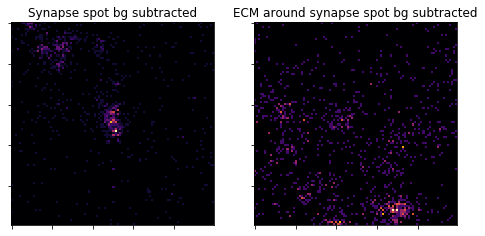

In [72]:
randomno=np.random.randint(1,len(dfvgluts))
fig=plt.figure(figsize=(8,4))
fig.add_subplot(121)
plt.imshow(dfvgluts["original_vglut_at_single_spot"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('Synapse spot bg subtracted')
fig.add_subplot(122)
plt.imshow(dfvgluts["ecm_around_single_spot"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('ECM around synapse spot bg subtracted')

print('size of synapse: '+str())

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


size of synapse: 


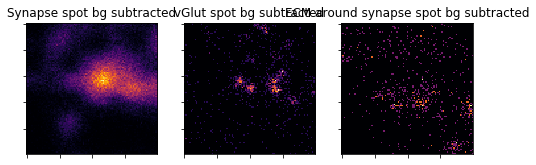

In [77]:
randomno=np.random.randint(1,len(dfboth))
fig=plt.figure(figsize=(8,4))
fig.add_subplot(131)
plt.imshow(dfboth["original_syt_at_single_spot"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('Synapse spot bg subtracted')
fig.add_subplot(132)
plt.imshow(dfboth["original_vglut_at_single_spot"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('vGlut spot bg subtracted')
fig.add_subplot(133)
fig.add_subplot(133)
plt.imshow(dfboth["ecm_around_single_spot"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('ECM around synapse spot bg subtracted')

print('size of synapse: '+str())

In [ ]:
randomno=np.random.randint(1,len(df)
fig=plt.figure(figsize=(8,4))
fig.add_subplot(121)
plt.imshow(dfsyts["original_syt_at_single_spot"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('Synapse spot bg subtracted')
fig.add_subplot(122)
plt.imshow(dfsyts["ecm_around_single_spot"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('ECM around synapse spot bg subtracted')

print('size of synapse: '+str())

## Add radial average

In [73]:
## radial_average version 2
def radial_average(image):
    import numpy as np
    import scipy
    from scipy import ndimage
    import matplotlib.pyplot as plt
    f = image
    sx, sy = f.shape
    X, Y = np.ogrid[0:sx, 0:sy]
    r = np.hypot(X - sx/2, Y - sy/2)
    rbin = (20* r/r.max()).astype(np.int) ##30 rings --> r-
    radial_mean = ndimage.mean(f, labels=rbin, index=np.arange(1, rbin.max() +1))
    return radial_mean

## Add meaningful columns to the dataframe

In [89]:
#make dfboth, which also contains column names for plotting (drug, condition)
dfboth['Condition']='Blocked + 12hrs'
dfboth.loc[dfboth['filename'].str.contains('unblocked'), 'Condition'] = 'Unblocked Control'

dfboth["expname"]='None'
dfboth.loc[dfboth['filename'].str.contains('20190216'), 'expname'] = '20190216_TNR580_DiO_VGlut647'
dfboth.loc[dfboth['filename'].str.contains('20190225'), 'expname'] = '20190225_TNR647_VGlut580_DiO'
dfboth.loc[dfboth['filename'].str.contains('20190302'), 'expname'] = '20190302_TNR647_Vglut580_DiO'
dfboth.loc[dfboth['filename'].str.contains('20190307'), 'expname'] = '20190307_TNR647_VGlut580_DiO_analyse'

In [100]:
df2=deepcopy(dfboth[dfboth["Condition"]=="Blocked + 12hrs"])
df2=df2.reset_index()

In [101]:
expnam=[]
medtnr=[]
medvglut=[]
medsyt=[]

for exp in df2["expname"].unique():
    dfexp=df2[df2["expname"]==exp]
    med_tnr=dfexp["ecm_around_single_spot_mean_intensity bg subtracted"].median()
    med_vglut=dfexp["mean_intensty_original_vglut bg subtracted"].median()
    med_syt=dfexp["mean_intensty_original_syt bg subtracted"].median()
    print(exp+' - med tnr: '+str(med_tnr)+' - med vglut: '+str(med_vglut))
    expnam.append(exp)
    medtnr.append(med_tnr)
    medvglut.append(med_vglut)
    medsyt.append(med_syt)
    
df2["ecm mean int norm2med"]=np.nan
df2["vglut mean int norm2med"]=np.nan
df2["syt mean int norm2med"]=np.nan
for i in range(0,len(df2)):
    if df2["expname"][i]==expnam[0]:
        df2["ecm mean int norm2med"][i]=df2["ecm_around_single_spot_mean_intensity bg subtracted"][i]/medtnr[0]
        df2["vglut mean int norm2med"][i]=df2["mean_intensty_original_vglut bg subtracted"][i]/medvglut[0]
        df2["syt mean int norm2med"][i]=df2["mean_intensty_original_syt bg subtracted"][i]/medsyt[0]
    '''if df2["expname"][i]==expnam[1]:
        df2["ecm mean int norm2med"][i]=df2["ecm_around_single_spot_mean_intensity bg subtracted"][i]/medtnr[1]
        df2["vglut mean int norm2med"][i]=df2["mean_intensty_original_vglut bg subtracted"][i]/medvglut[1]
        df2["syt mean int norm2med"][i]=df2["mean_intensty_original_syt bg subtracted"][i]/medsyt[1]
    if df2["expname"][i]==expnam[2]:
        df2["ecm mean int norm2med"][i]=df2["ecm_around_single_spot_mean_intensity bg subtracted"][i]/medtnr[2]
        df2["vglut mean int norm2med"][i]=df2["mean_intensty_original_vglut bg subtracted"][i]/medvglut[2]
        df2["syt mean int norm2med"][i]=df2["mean_intensty_original_syt bg subtracted"][i]/medsyt[2]
    if df2["expname"][i]==expnam[3]:
        df2["ecm mean int norm2med"][i]=df2["ecm_around_single_spot_mean_intensity bg subtracted"][i]/medtnr[3]
        df2["vglut mean int norm2med"][i]=df2["mean_intensty_original_vglut bg subtracted"][i]/medvglut[3]
        df2["syt mean int norm2med"][i]=df2["mean_intensty_original_syt bg subtracted"][i]/medsyt[3]'''

None - med tnr: 0.0003739940588235294 - med vglut: 0.0004554741960784314


/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [168]:
df2=df2[df2["ecm mean int norm2med"]<
               df2["ecm mean int norm2med"].quantile(.9)]
df2=df2[df2["vglut mean int norm2med"]<
               df2["vglut mean int norm2med"].quantile(.9)]
df2=df2[df2["syt mean int norm2med"]<
               df2["syt mean int norm2med"].quantile(.9)]

## Correlate vGlut intensity to TNR intensity - all spots together

### scatterplot: each point = one spot, x= TNR mean intensity, y=vGlut mean intensity

<Figure size 432x288 with 0 Axes>

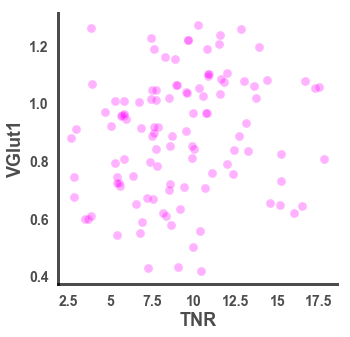

In [169]:
from matplotlib import ticker
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("white")
sns.despine()
sns.set_palette("Set2")

fig=plt.figure(figsize=(5,5))
g=sns.scatterplot(x="ecm mean int norm2med",
                  y="vglut mean int norm2med",data=df2,
               color="magenta",alpha=0.3,s=80)
#g.set_xscale('log')
plt.title('')
plt.locator_params(axis='y', nbins=5)
plt.yticks(visible=True,weight='bold',color='black',alpha=.7,fontsize=14)
plt.xticks(visible=True,weight='bold',color='black',alpha=.7,fontsize=14)


g.tick_params(width=3,color='black')
#g.set_ylabel('Fluorescence intensity (AU)',color='black',alpha=.7,labelpad=3,size=28,weight='bold')
g.set_ylabel('VGlut1',color='black',alpha=.7,fontsize=18,weight='bold')
g.set_xlabel('TNR',color='black',alpha=.7,fontsize=18,weight='bold')
g.grid(False)

sns.despine(ax=g,right=True,top=True)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(3)
  g.spines[axis].set_color('black')
  g.spines[axis].set_alpha(.7)

scale_x=1/10
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
g.xaxis.set_major_formatter(ticks_x)



<Figure size 432x288 with 0 Axes>

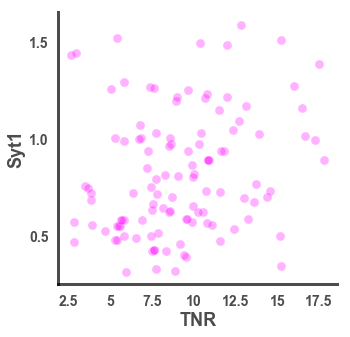

In [170]:
from matplotlib import ticker
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("white")
sns.despine()
sns.set_palette("Set2")

fig=plt.figure(figsize=(5,5))
g=sns.scatterplot(x="ecm mean int norm2med",
                  y="syt mean int norm2med",data=df2,
               color="magenta",alpha=0.3,s=80)
#g.set_xscale('log')
plt.title('')
plt.locator_params(axis='y', nbins=5)
plt.yticks(visible=True,weight='bold',color='black',alpha=.7,fontsize=14)
plt.xticks(visible=True,weight='bold',color='black',alpha=.7,fontsize=14)


g.tick_params(width=3,color='black')
#g.set_ylabel('Fluorescence intensity (AU)',color='black',alpha=.7,labelpad=3,size=28,weight='bold')
g.set_ylabel('Syt1',color='black',alpha=.7,fontsize=18,weight='bold')
g.set_xlabel('TNR',color='black',alpha=.7,fontsize=18,weight='bold')
g.grid(False)

sns.despine(ax=g,right=True,top=True)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(3)
  g.spines[axis].set_color('black')
  g.spines[axis].set_alpha(.7)

scale_x=1/10
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
g.xaxis.set_major_formatter(ticks_x)




Text(0.2, 2.8, 'Pearson r: 0.115')

<Figure size 432x288 with 0 Axes>

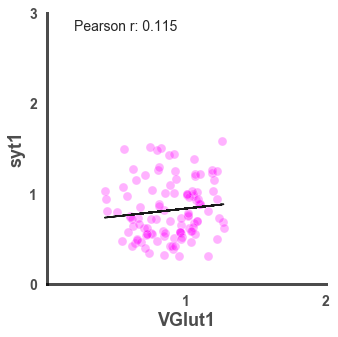

In [171]:
from matplotlib import ticker
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("white")
sns.despine()
sns.set_palette("Set2")

fig=plt.figure(figsize=(5,5))
g=sns.scatterplot(x="vglut mean int norm2med",
                  y="syt mean int norm2med",data=df2,
               color="magenta",alpha=0.3,s=80)
#g.set_xscale('log')
plt.title('')
plt.locator_params(axis='y', nbins=5)
plt.yticks(visible=True,weight='bold',color='black',alpha=.7,fontsize=14)
plt.xticks(visible=True,weight='bold',color='black',alpha=.7,fontsize=14)


g.tick_params(width=3,color='black')
#g.set_ylabel('Fluorescence intensity (AU)',color='black',alpha=.7,labelpad=3,size=28,weight='bold')
g.set_ylabel('syt1',color='black',alpha=.7,fontsize=18,weight='bold')
g.set_xlabel('VGlut1',color='black',alpha=.7,fontsize=18,weight='bold')
g.grid(False)

sns.despine(ax=g,right=True,top=True)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(3)
  g.spines[axis].set_color('black')
  g.spines[axis].set_alpha(.7)

#scale_x=1/10
#ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
#g.xaxis.set_major_formatter(ticks_x)

x=df2["vglut mean int norm2med"]
y=df2["syt mean int norm2med"]
m,b = np.polyfit(x, y, 1) 

plt.plot( x, m*x+b, '--k') 

from pydoc import help
from scipy.stats.stats import pearsonr
[r, pval]=pearsonr(df2["syt mean int norm2med"],df2["vglut mean int norm2med"])
plt.xlim([0,2])
plt.ylim([0,3])
plt.xticks([1,2])
plt.text(x=0.2,y=2.8,s=('Pearson r: ' + str(np.around(r,3))),fontsize=14)

## Split into bins according to vglut intensity, look at average TNR intensity in each bin, for each exp separately

In [172]:
number_of_bins=10

In [173]:
df2["vglut brightness scale (0 = dimmest)"]=pd.cut(df2["vglut mean int norm2med"],
                                                    bins=number_of_bins,labels=np.arange(number_of_bins),
                                                    right=False)
df2["syt brightness scale (0 = dimmest)"]=pd.cut(df2["syt mean int norm2med"],
                                                    bins=number_of_bins,labels=np.arange(number_of_bins),
                                                    right=False)

## average tnr in each bin

0
0: 3 vgluts
1
1: 6 vgluts
2
2: 13 vgluts
3
3: 14 vgluts
4
4: 12 vgluts
5
5: 13 vgluts
6
6: 14 vgluts
7
7: 22 vgluts
8
8: 5 vgluts
9
9: 11 vgluts


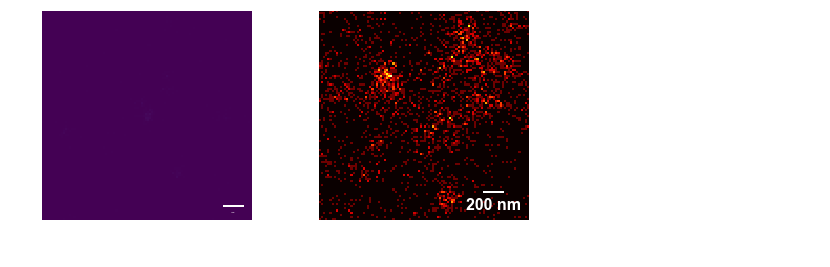

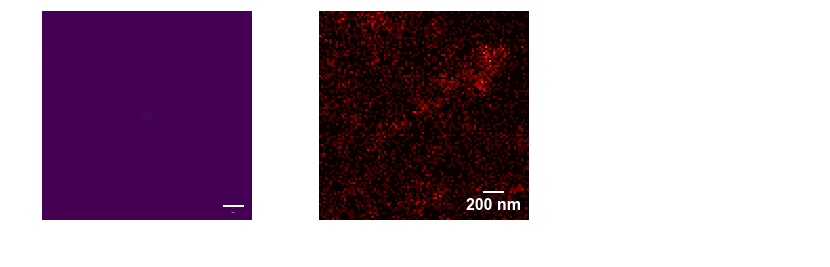

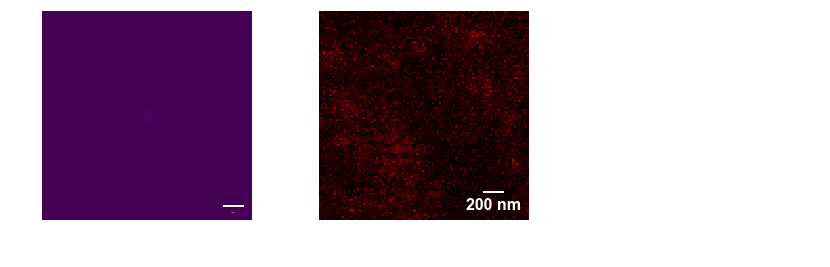

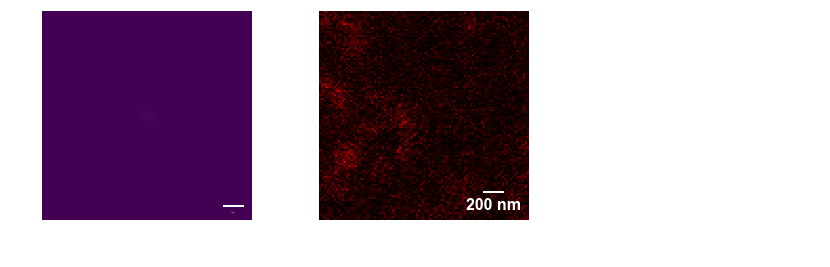

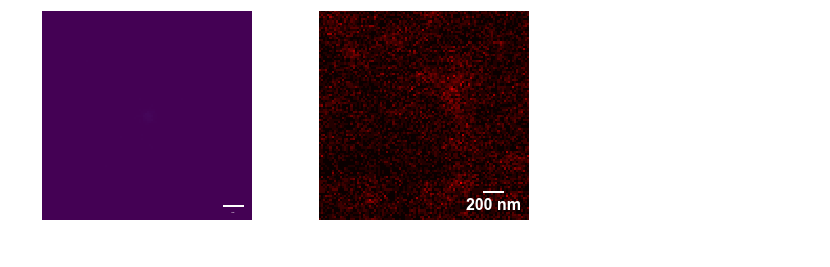

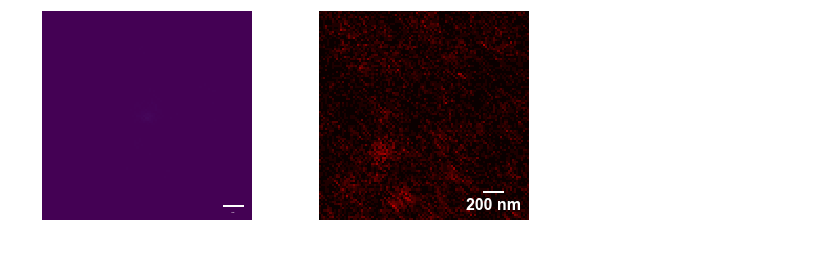

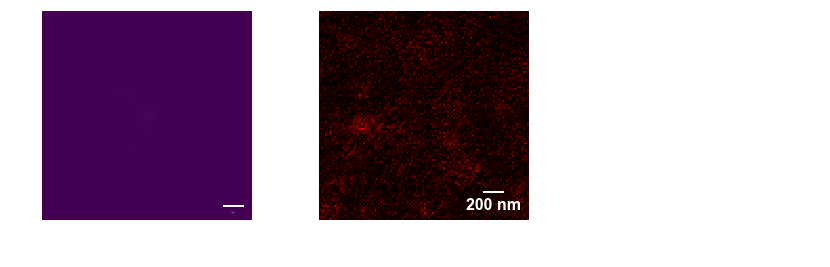

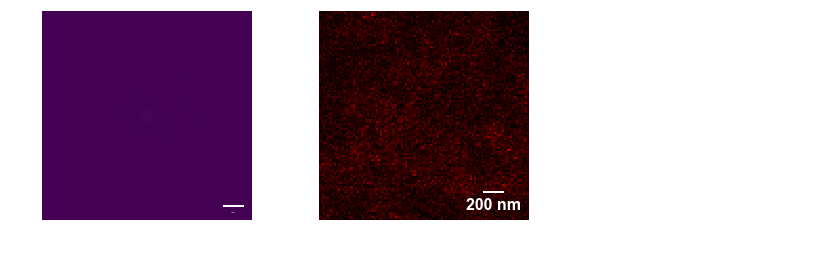

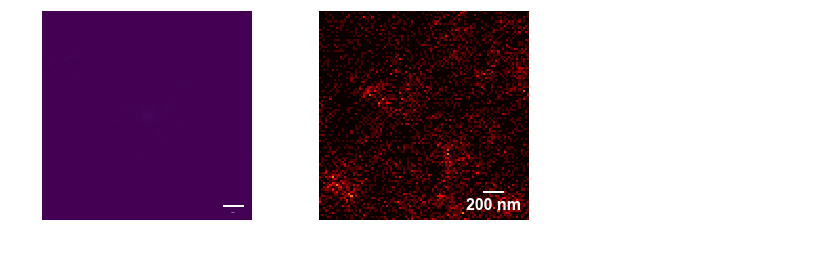

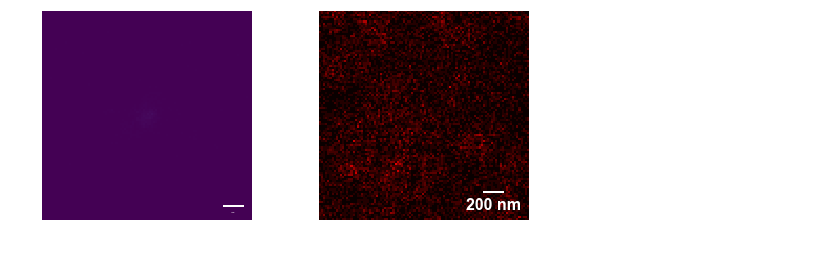

In [174]:
mean_vglut_int_in_bin=[]
mean_tnr_int_in_bin=[]

for i in range(number_of_bins):
    df2plot=df2[(df2["vglut brightness scale (0 = dimmest)"].astype(int)==i)&
                (df2["Time"]!="Unblocked Control")]
    print(i)
    fig=plt.figure(figsize=(12,4))
    plt.axis('off')
    fig.add_subplot(132)
    plt.imshow(df2plot["ecm_around_single_spot bg subtracted"].mean()
               ,cmap='hot',
               vmin=0.95*np.min(df2["ecm_around_single_spot bg subtracted"].mean()),
               vmax=10*np.max(df2["ecm_around_single_spot bg subtracted"].mean()))
    scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)
    plt.axis('off')
    plt.ylabel('Bin: '+str(i))
    fig.add_subplot(131)
    plt.imshow(df2plot["original_vglut_at_single_spot bg subtracted"].mean(),
               cmap='viridis',
               vmin=0,#np.min(df2plot["original_vglut_at_single_spot bg subtracted"].mean()),
               vmax=52*np.max(df2["original_vglut_at_single_spot bg subtracted"].mean()))
    numbervgluts=len(df2plot["original_vglut_at_single_spot bg subtracted"])
    print(str(i)+': '+str(numbervgluts)+' vgluts')
    
    scalebar = ScaleBar(20, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':0,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)
    plt.axis('off')

    plt.locator_params(axis='y', nbins=3)
    plt.locator_params(axis='x', nbins=5)
    plt.ylabel('',size=16,labelpad=5)
    plt.xlabel('nm',size=16,labelpad=5)
    #plt.subplots_adjust(right=1.2)
    plt.tight_layout()
  

In [175]:
df2plot=df2
#df2plot=dfnew
vglut_bin_type="vglut brightness scale (0 = dimmest)"
#vglut_bin_type='vglut mean intensity ordinal bin'

means_in_bins_exps={"Exp name":[],"bin number":[],"mean vglut":[],"mean tnr":[],"number of spots":[],
                    "mean vglut int in bin overall":[]}



for exp in df2plot["expname"].unique():
    dfexp=df2plot[df2plot["expname"]==exp]
    for i in range(0,5):
        
        mean_in_bin=df2plot[df2plot[vglut_bin_type].astype(int)==i]["vglut mean int norm2med"].mean()
        
        dfplot=dfexp[(dfexp[vglut_bin_type].astype(int)==i)&
                    (dfexp["Time"]!="Unblocked Control")]

        means_in_bins_exps["Exp name"].append(exp)
        means_in_bins_exps["bin number"].append(i)
        means_in_bins_exps["mean vglut int in bin overall"].append(mean_in_bin)
        means_in_bins_exps["mean vglut"].append(dfplot["vglut mean int norm2med"].mean())
        means_in_bins_exps["mean tnr"].append(dfplot["ecm mean int norm2med"].mean())
        novgluts=len(dfplot)
        means_in_bins_exps["number of spots"].append(novgluts)

In [176]:
df2plot=df2
#df2plot=dfnew
syt_bin_type="syt brightness scale (0 = dimmest)"
#syt_bin_type='syt mean intensity ordinal bin'

means_in_binsexps_syt={"Exp name":[],"bin number":[],"mean syt":[],"mean tnr":[],"number of spots":[],
                    "mean syt int in bin overall":[]}



for exp in df2plot["expname"].unique():
    dfexp=df2plot[df2plot["expname"]==exp]
    for i in range(0,5):
        
        mean_in_bin=df2plot[df2plot[syt_bin_type].astype(int)==i]["syt mean int norm2med"].mean()
        
        dfplot=dfexp[(dfexp[syt_bin_type].astype(int)==i)&
                    (dfexp["Time"]!="Unblocked Control")]

        means_in_binsexps_syt["Exp name"].append(exp)
        means_in_binsexps_syt["bin number"].append(i)
        means_in_binsexps_syt["mean syt int in bin overall"].append(mean_in_bin)
        means_in_binsexps_syt["mean syt"].append(dfplot["syt mean int norm2med"].mean())
        means_in_binsexps_syt["mean tnr"].append(dfplot["ecm mean int norm2med"].mean())
        nosyts=len(dfplot)
        means_in_binsexps_syt["number of spots"].append(nosyts)

In [177]:
dfmeans=pd.DataFrame(means_in_bins_exps)
dfmeans["mean vglut int in bin overall"]=np.around(dfmeans["mean vglut int in bin overall"],1)
dfmeans_syt=pd.DataFrame(means_in_binsexps_syt)
dfmeans_syt["mean syt int in bin overall"]=np.around(dfmeans_syt["mean syt int in bin overall"],1)

Text(0.5, 1, 'Pearson r: 0.426')

<Figure size 432x288 with 0 Axes>

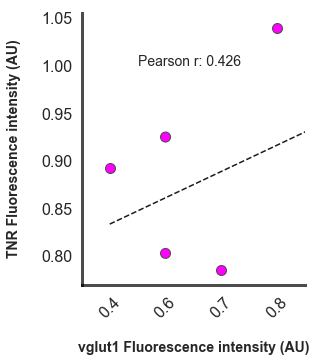

In [178]:
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("white")
sns.despine()
sns.set_palette("Set2")

#y="intensity normd 0 to 1"
var="mean tnr"
#y="intensity raw"
#y="raw intensity normd to dio mean"
plt.figure(figsize=(4,5))
#order=['2hrs','4hrs','12hrs','No Blocking']
#palette ={"No Blocking":"gray","2hrs":"magenta","4hrs":"magenta","12hrs":"magenta"}

'''g=sns.barplot(x="mean vglut int in bin overall",y="mean tnr",
                data=dfmeans,alpha=0.3,ci=None,color='magenta')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        

change_width(g, .7)'''

g=sns.swarmplot(x="mean vglut int in bin overall",y="mean tnr",
                data=dfmeans,size=10,color='magenta',linewidth=1,)

plt.errorbar(x=[0,1,2,3,4],
             y=[dfmeans[dfmeans["bin number"]==0][var].mean(),
                dfmeans[dfmeans["bin number"]==1][var].mean(),
                dfmeans[dfmeans["bin number"]==2][var].mean(),
                dfmeans[dfmeans["bin number"]==3][var].mean(),
                dfmeans[dfmeans["bin number"]==4][var].mean()],
             yerr=[dfmeans[dfmeans["bin number"]==0][var].sem(),
                   dfmeans[dfmeans["bin number"]==1][var].sem(),
                   dfmeans[dfmeans["bin number"]==2][var].sem(),
                   dfmeans[dfmeans["bin number"]==3][var].sem(),
                   dfmeans[dfmeans["bin number"]==4][var].sem()],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,capthick=3)

#g.hlines(dfmeans[dfmeans["bin number"]==0][var].mean(), xmin=-0.2, xmax=0.6, linewidth=3, color='magenta')
#g.hlines(dfmeans[dfmeans["bin number"]==1][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')
#g.hlines(dfmeans[dfmeans["bin number"]==2][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')
#g.hlines(dfmeans[dfmeans["bin number"]==3][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')
#g.hlines(dfmeans[dfmeans["bin number"]==4][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')



#scale_y=1/100
#ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
#g.yaxis.set_major_formatter(ticks_y)
g.set_ylabel('TNR Fluorescence intensity (AU)',size=14,weight ='bold',labelpad=20)
g.set_xlabel('vglut1 Fluorescence intensity (AU)',size=14,weight ='bold',labelpad=20)
plt.xticks(g.get_xticks(),size=16,rotation=45)
plt.yticks(g.get_yticks(),size=16)
g.grid(False)

sns.despine(ax=g,right=True,top=True)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(3)
  g.spines[axis].set_color('black')
  g.spines[axis].set_alpha(.7)



x = np.arange(0,5,1)
y = [dfmeans[dfmeans["bin number"]==0][var].mean(),
                dfmeans[dfmeans["bin number"]==1][var].mean(),
                dfmeans[dfmeans["bin number"]==2][var].mean(),
                dfmeans[dfmeans["bin number"]==3][var].mean(),
                dfmeans[dfmeans["bin number"]==4][var].mean()] # 10, not 9, so the fit isn't perfect

m,b = np.polyfit(x, y, 1) 

plt.plot( x, m*x+b, '--k') 
from pydoc import help
from scipy.stats.stats import pearsonr
[r, pval]=pearsonr(x,y)
#plt.xlim([0,2])
#plt.ylim([0,3])
#plt.xticks([1,2])
plt.text(x=0.5,y=1,s=('Pearson r: ' + str(np.around(r,3))),fontsize=14)

Text(0.5, 1, 'Pearson r: 0.721')

<Figure size 432x288 with 0 Axes>

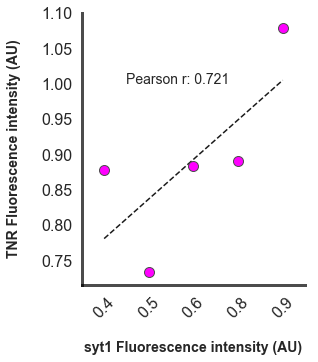

In [179]:
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("white")
sns.despine()
sns.set_palette("Set2")

#y="intensity normd 0 to 1"
var="mean tnr"
#y="intensity raw"
#y="raw intensity normd to dio mean"
plt.figure(figsize=(4,5))
#order=['2hrs','4hrs','12hrs','No Blocking']
#palette ={"No Blocking":"gray","2hrs":"magenta","4hrs":"magenta","12hrs":"magenta"}

'''g=sns.barplot(x="mean syt int in bin overall",y="mean tnr",
                data=dfmeans_syt,alpha=0.3,ci=None,color='magenta')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        

change_width(g, .7)'''

g=sns.swarmplot(x="mean syt int in bin overall",y="mean tnr",
                data=dfmeans_syt,size=10,color='magenta',linewidth=1,)

plt.errorbar(x=[0,1,2,3,4],
             y=[dfmeans_syt[dfmeans_syt["bin number"]==0][var].mean(),
                dfmeans_syt[dfmeans_syt["bin number"]==1][var].mean(),
                dfmeans_syt[dfmeans_syt["bin number"]==2][var].mean(),
                dfmeans_syt[dfmeans_syt["bin number"]==3][var].mean(),
                dfmeans_syt[dfmeans_syt["bin number"]==4][var].mean()],
             yerr=[dfmeans_syt[dfmeans_syt["bin number"]==0][var].sem(),
                   dfmeans_syt[dfmeans_syt["bin number"]==1][var].sem(),
                   dfmeans_syt[dfmeans_syt["bin number"]==2][var].sem(),
                   dfmeans_syt[dfmeans_syt["bin number"]==3][var].sem(),
                   dfmeans_syt[dfmeans_syt["bin number"]==4][var].sem()],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,capthick=3)

#g.hlines(dfmeans_syt[dfmeans_syt["bin number"]==0][var].mean(), xmin=-0.2, xmax=0.6, linewidth=3, color='magenta')
#g.hlines(dfmeans_syt[dfmeans_syt["bin number"]==1][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')
#g.hlines(dfmeans_syt[dfmeans_syt["bin number"]==2][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')
#g.hlines(dfmeans_syt[dfmeans_syt["bin number"]==3][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')
#g.hlines(dfmeans_syt[dfmeans_syt["bin number"]==4][var].mean(), xmin=-0.5, xmax=0.5, linewidth=3, color='magenta')



#scale_y=1/100
#ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
#g.yaxis.set_major_formatter(ticks_y)
g.set_ylabel('TNR Fluorescence intensity (AU)',size=14,weight ='bold',labelpad=20)
g.set_xlabel('syt1 Fluorescence intensity (AU)',size=14,weight ='bold',labelpad=20)
plt.xticks(g.get_xticks(),size=16,rotation=45)
plt.yticks(g.get_yticks(),size=16)
g.grid(False)

sns.despine(ax=g,right=True,top=True)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(3)
  g.spines[axis].set_color('black')
  g.spines[axis].set_alpha(.7)



x = np.arange(0,5,1)
y = [dfmeans_syt[dfmeans_syt["bin number"]==0][var].mean(),
                dfmeans_syt[dfmeans_syt["bin number"]==1][var].mean(),
                dfmeans_syt[dfmeans_syt["bin number"]==2][var].mean(),
                dfmeans_syt[dfmeans_syt["bin number"]==3][var].mean(),
                dfmeans_syt[dfmeans_syt["bin number"]==4][var].mean()] # 10, not 9, so the fit isn't perfect

m,b = np.polyfit(x, y, 1) 

plt.plot( x, m*x+b, '--k') 
from pydoc import help
from scipy.stats.stats import pearsonr
[r, pval]=pearsonr(x,y)
#plt.xlim([0,2])
#plt.ylim([0,3])
#plt.xticks([1,2])
plt.text(x=0.5,y=1,s=('Pearson r: ' + str(np.around(r,3))),fontsize=14)